# Qn No.1

In [81]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [82]:
#Load dataset
iris_csv = pd.read_csv('./Iris.csv')
iris_df = datasets.load_iris()
iris_csv.drop('Id',axis=1,inplace=True)
iris_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [83]:
# optimal mapping of cluster ids to class labels
X=iris_df.data
np.random.shuffle(X)
cluster1 = X[0:50,:]
cluster2 = X[50:100,:]
cluster3 = X[100:150,:]

In [84]:
# Assign every training example x^(i) to its closest centroid, given the current centroid positions.returns the array of assigned clusters to each example
def find_closest_centroids(X, centroids):
    m = X.shape[0] # no of datappints
    k = centroids.shape[0]  #division size
    idx = np.zeros(m) # array to assign the centriod
    for i in range (X.shape[0]):
        distances = np.linalg.norm(X[i]-centroids, axis=1)
        min_dist = np.argmin(distances)
        idx[i] = min_dist
    return idx

In [85]:
# Update Centroids. Return Updated Values of all K centroids
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))  #3*4
    for i in range(k):
        centroids[i,:] = np.mean(X[idx.ravel() == i,:], axis = 0)
    return centroids        

In [86]:
def k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        # find closest centroid
        idx = find_closest_centroids(X, centroids)
        #update centroids
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids
 

In [87]:
initial_centroids = initial_centroids = np.array([X[random.randint(0,50)], X[random.randint(50,100)], X[random.randint(100,150)]])
# Select k=3 , pick 3 random centroids from data
idx, centroids = k_means(X, initial_centroids, 1)# use 1 iterations to perform clustering

In [88]:
k_Meancluster1 = X[np.where(idx == 0)[0],:]
k_Meancluster2 = X[np.where(idx == 1)[0],:]
k_Meancluster3 = X[np.where(idx == 2)[0],:]

### Initial clustering

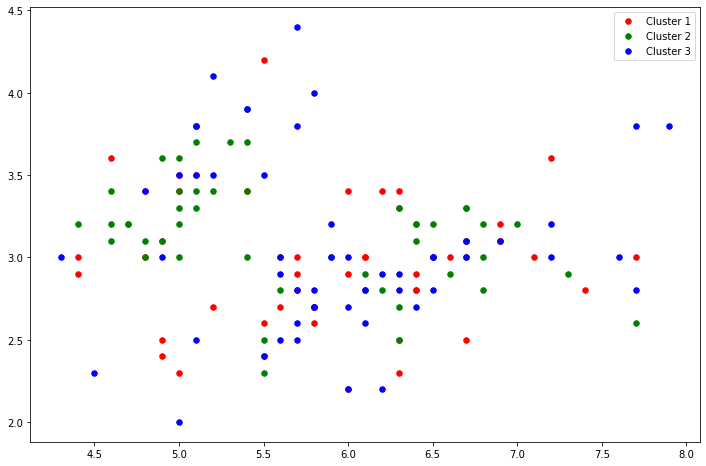

In [89]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

### Final clustering

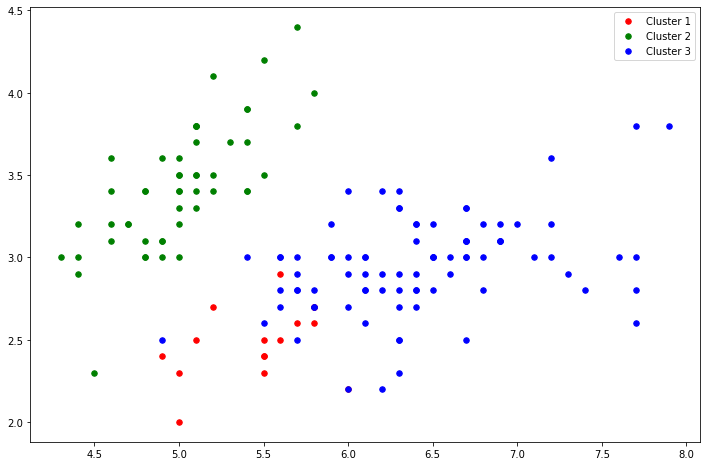

In [90]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(k_Meancluster1[:,0], k_Meancluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(k_Meancluster2[:,0], k_Meancluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(k_Meancluster3[:,0], k_Meancluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

In [91]:
X = iris_csv.drop('Species',1)
y = iris_csv.Species

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)

C:\Users\Varsha R\AppData\Local\Temp\ipykernel_6712\2978420282.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = iris_csv.drop('Species',1)


### Confusion  Matrix

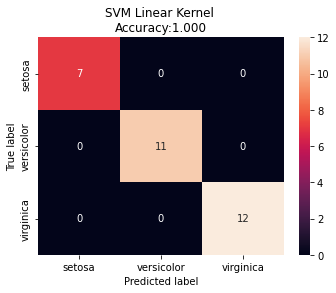

In [92]:
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Accuracy of clustering by running alogorithm 55 times

In [94]:
def most_common(lst):
    return max(set(lst), key=lst.count)
def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KNeighborsClassifier:
    def __init__(self, k=3, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

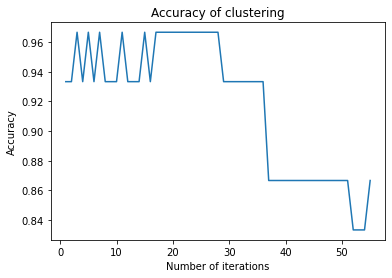

In [95]:
# Test knn model across varying ks
accuracies = []
ks = range(1, 56)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
# Visualize accuracy vs. Number of iteration
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="Number of iterations",
       ylabel="Accuracy",
       title="Accuracy of clustering")
plt.show()

### Conclusion: The model overall accuracy on the test set is 0.933. The accuracy of the clustering reduce on increase in number of iterations.

# Qn No. 2

In [96]:
# defines the reward matrix
r = np.array([[-1, -1, -1, -1,  0,  -1],
              [-1, -1, -1,  0, -1, 100],
              [-1, -1, -1,  0, -1,  -1],
              [-1,  0,  0, -1,  0,  -1],
              [ 0, -1, -1,  0, -1, 100],
              [-1,  0, -1, -1,  0, 100]]).astype("float64")
q = np.zeros_like(r)
 
 
def update_q(state, next_state, action, alpha, gamma):
    r_sa = r[state, action]
    q_sa = q[state, action]
    new_q = q_sa + alpha * (r_sa + gamma * max(q[next_state, :]) - q_sa)
    q[state, action] = new_q
    # rescale to between 0 and 1
    rn = q[state][q[state] > 0]/ np.sum(q[state][q[state] > 0])
    q[state][q[state] > 0] = rn
    return r[state, action]
 
 
def show_path():
    # show all the paths
    for i in range(len(q)):
        current_state = i
        path = "%i -> " % current_state
        n_steps = 0
        while current_state != 5 and n_steps < 20:
            next_state = np.argmax(q[current_state])
            current_state = next_state
            path += "%i -> " % current_state
            n_steps = n_steps + 1
        # cut off final arrow
        path = path[:-4]
        print("Optimal Path for starting state %i" % i)
        print(path)
        print("")



# hyperparameters
gamma = 0.3 #vary this between 0 and 1 i.e., (0,1)
alpha = 0.9 #vary this between 0 and 1 inclusive, i.e., [0,1]
n_episodes = 400 #try different values, e.g., 10, 500, 10000 and so forth
epsilon = 0.05 #you can experiment with this as well

n_states = 6
n_actions = 6

random_state = np.random.RandomState(10) #you may try without seed value and other seed values

for e in range(int(n_episodes)):
    states = list(range(n_states))
    random_state.shuffle(states)
    current_state = states[0]
    goal = False
    if e % int(n_episodes / 10.) == 0 and e > 0:
        pass
    while not goal:
        # epsilon greedy
        valid_moves = r[current_state] >= 0
        if random_state.rand() < epsilon:
            actions = np.array(list(range(n_actions)))
            actions = actions[valid_moves == True]
            if type(actions) is int:
                actions = [actions]
            random_state.shuffle(actions)
            action = actions[0]
            next_state = action
        else:
            if np.sum(q[current_state]) > 0:
                action = np.argmax(q[current_state])
            else:
                # Don't allow invalid moves at the start
                # Just take a random move
                actions = np.array(list(range(n_actions)))
                actions = actions[valid_moves == True]
                random_state.shuffle(actions)
                action = actions[0]
            next_state = action
        reward = update_q(current_state, next_state, action,
                          alpha=alpha, gamma=gamma)
        # Goal due to  rescaling
        if reward > 1:
            goal = True
        current_state = next_state
print ("Q Table") 
print(q)
show_path()

Q Table
[[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.05142911e-005
  0.00000000e+000 9.99989486e-001]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 3.18707031e-001 3.30146330e-001 0.00000000e+000
  3.51146639e-001 0.00000000e+000]
 [2.56426235e-140 0.00000000e+000 0.00000000e+000 1.81457827e-060
  0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 1.00000000e+000]]
Optimal Path for starting state 0
0 -> 4 -> 5

Optimal Path for starting state 1
1 -> 5

Optimal Path for starting state 2
2 -> 3 -> 4 -> 5

Optimal Path for starting state 3
3 -> 4 -> 5

Optimal Path for starting state 4
4 -> 5

Optimal Path for starting state 5
5



Ref:

1.https://www.kaggle.com/code/mohamedbelkheir/confusion-matrix-on-iris
2.https://towardsdatascience.com/create-your-own-k-nearest-neighbors-algorithm-in-python-eb7093fc6339
3.https://github.com/HxnDev/K-Means-on-IRIS-Dataset/blob/main/main.ipynb